In [38]:
import math
import numpy as np
scan = np.loadtxt('../laserscan.dat')
angle = np.linspace(-math.pi/2, math.pi/2, np.shape(scan)[0], endpoint='true')

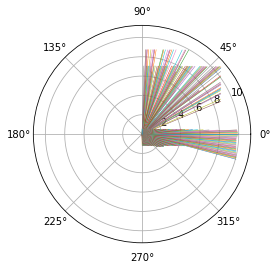

In [2]:
import matplotlib.pyplot as plt

for i in range(np.shape(scan)[0]):
    plt.polar([angle[i], angle[i]],[0,scan[i]], "-", linewidth=0.5)
plt.show()

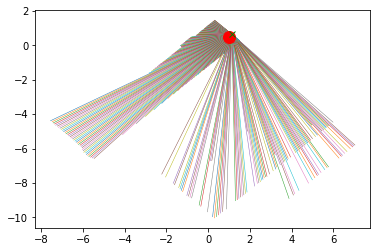

In [41]:
import lab01_2d_xform as lab01

robot_pose = np.array([[1.0, 0.5, np.pi * 0.25]])
lidar_pose_wrt_robot_frame = np.array([[0.2, 0.0, np.pi]])
lidar_pose_wrt_global_frame = lab01.robot_to_global_frame(
    robot_pose, lidar_pose_wrt_robot_frame[:, 0:2])

t_global_2_robot = lab01.pose_to_transform_matrix_3x3(robot_pose)
t_robot_2_lidar = lab01.pose_to_transform_matrix_3x3(lidar_pose_wrt_robot_frame)
t_global_2_lidar = np.matmul(t_global_2_robot, t_robot_2_lidar)

# Convert lidar polar coordinates to cartesian
lidar_xy_homogeneous_wrt_lidar_frame = np.stack(
    (scan * np.cos(angle),
     scan * np.sin(angle),
     np.ones(np.shape(scan)[0])))
lidar_xy_homogeneous_wrt_global_frame = np.matmul(
    t_global_2_lidar, lidar_xy_homogeneous_wrt_lidar_frame)
lidar_xy_wrt_global_frame = np.stack(
    (lidar_xy_homogeneous_wrt_global_frame[0,:] / 
     lidar_xy_homogeneous_wrt_global_frame[2,:], 
     lidar_xy_homogeneous_wrt_global_frame[1,:] / 
     lidar_xy_homogeneous_wrt_global_frame[2,:]))


for i in range(np.shape(scan)[0]):
    plt.plot(
        [lidar_pose_wrt_global_frame[0,0], lidar_xy_wrt_global_frame[0,i]],
        [lidar_pose_wrt_global_frame[0,1], lidar_xy_wrt_global_frame[1,i]],
        "-", linewidth=0.5)
plt.plot(robot_pose[0,0], robot_pose[0,1], "or", markersize=12)
plt.plot(lidar_pose_wrt_global_frame[0,0], lidar_pose_wrt_global_frame[0,1],
         "gx", markersize=6)
plt.show()